In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
sns.set()
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

### Import the data, and take a look.

In [26]:
df = pd.read_csv("creditcard.csv")

In [27]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Check the missing value.

In [29]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Name the class.

In [30]:
class_names = {1:"Fraud", 0:"Not Fraud"}
print(df.Class.value_counts().rename(index = class_names))

Class
Not Fraud    284315
Fraud           492
Name: count, dtype: int64


### Prepare the X, y for the train and test.

In [31]:
from sklearn.model_selection import train_test_split
feature_names = df.iloc[:, 0:30].columns
target = df.iloc[:1, 30: ].columns
print(feature_names)
print(target)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [32]:
X = df[feature_names]
y = df[target]

### X is the feature matrix, and y is your response variable (containing the labels/values you want to predict).

In [33]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

### 70% for training, 30% for testing.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

The accuracy and the Area Under the ROC Curve (AUC) are both common metrics used to evaluate the performance of classification models, but they capture different aspects of model performance.

1. **Accuracy**:
   - Measures the proportion of correctly classified samples out of the total number of samples.
   - It provides a simple and intuitive measure of overall model correctness.
   - It's sensitive to class imbalance; it can be misleading when classes are imbalanced.

2. **AUC (Area Under the ROC Curve)**:
   - Measures the ability of the model to distinguish between classes.
   - It's insensitive to class distribution and provides an aggregate measure of performance across all possible classification thresholds.
   - AUC ranges from 0 to 1, where 0.5 indicates random guessing and 1 indicates perfect discrimination.

Comparing the two:
- **Accuracy** is more straightforward to interpret and is useful when the cost of false positives and false negatives is roughly equal.
- **AUC** is useful when you need to assess the model's ability to discriminate between classes across various threshold levels, especially in imbalanced datasets or when the costs of false positives and false negatives differ significantly.

In summary, accuracy gives an overall view of correct classifications, while AUC provides insight into the model's ability to rank instances correctly in terms of their predicted probabilities. Both metrics are valuable and can be used depending on the specific goals and characteristics of the classification problem.

### We don't deal with the imbalanced data here, the accuracy may not correct.

In [35]:
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }

xgb_clf = XGBClassifier(**params)
xgb_clf.fit(X_train, y_train)
# make predictions on test data
y_pred = xgb_clf.predict(X_test)
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.9995


### Feature importance plots.

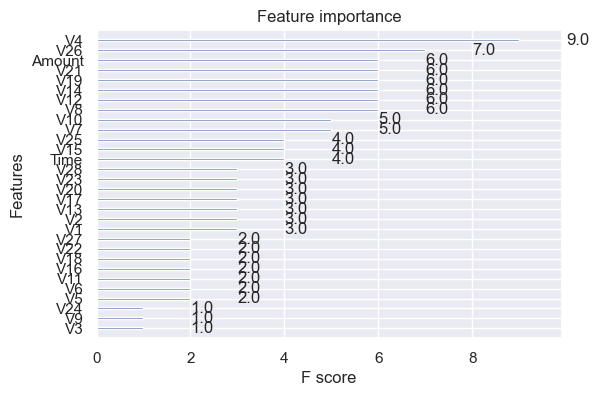

In [36]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

### Consider the test-AUC.

XGBoost model AUC score: 0.9871


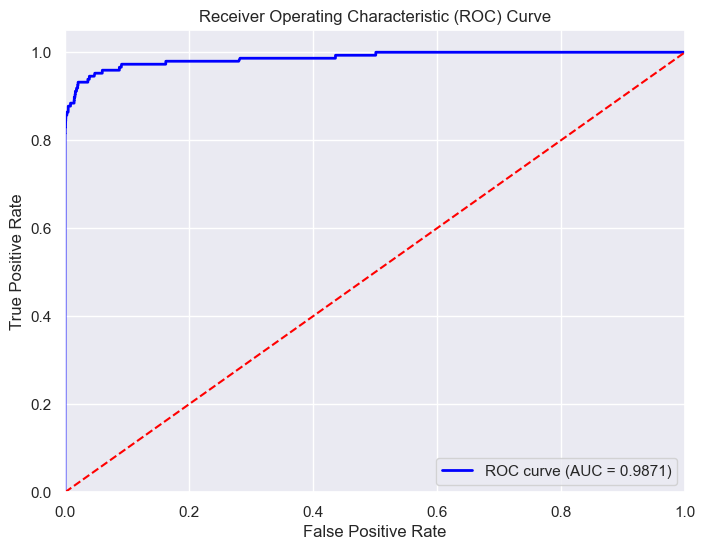

In [37]:
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('XGBoost model AUC score: {0:0.4f}'.format(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {0:0.4f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Perform the 5-folds-cross-validation.

In [38]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=100, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)


In [39]:
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.882510,0.016232,0.873857,0.016601
1,0.904222,0.003561,0.902211,0.009182
2,0.905128,0.004502,0.902111,0.009247
3,0.905126,0.004490,0.902111,0.009252
4,0.906547,0.003505,0.904818,0.010441
...,...,...,...,...
95,0.994121,0.000637,0.982510,0.004195
96,0.994220,0.000600,0.982540,0.003938
97,0.994302,0.000573,0.982646,0.003956
98,0.994425,0.000567,0.982813,0.004029


### Perform GridSearchCV (more general way).

In [40]:
%%time

xgb_classifier = XGBClassifier()
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': np.arange(0.1, 1.1, 0.1),
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.2]
}


grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Access results
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)


Best Parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best ROC-AUC Score: 0.983207432984025
CPU times: user 1h 1min 17s, sys: 20min 59s, total: 1h 22min 16s
Wall time: 8min 28s


In [41]:
best_model = grid_search.best_estimator_

# Get the predicted probabilities for both classes
y_pred_proba = best_model.predict_proba(X_test)

# For binary classification, the second column contains the probability of the positive class
y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba_positive)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9799376114167295
